In [13]:
#Import necessary packages and load Auto.csv dataset

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt

X = pd.read_csv('kyliehoar/kyliehoar/Auto.csv')
print(X)

#ABOUT AUTO.CSV
#dataset detailing information on 392 vehicles
#mpg = miles per gallon
#cylinders = number of cylinders between 4 and 8
#displacement = engine displacement (cu. inches)
#horsepower = engine horsepower
#weight = vehicle weight (lbs.)
#acceleration = time to accelerate from 0 to 60 mpg (sec.)
#year = model year (modulo 100)
#origin = origin of car (1. American, 2. European, 3. Japanese)
#name = vehicle name

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.45e-79
Time:                        17:19:25   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

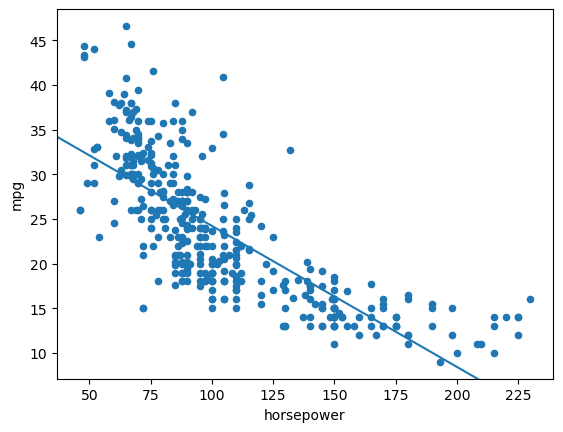

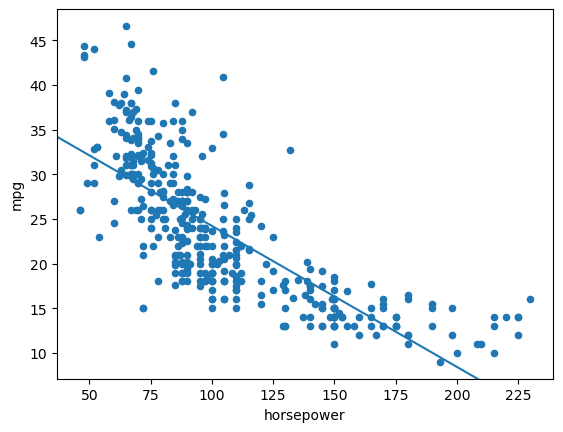

In [14]:
#Extract mpg and horsepower and create Linear Regression model and plot

#Replace N/A values in horsepower w/ mean

X['horsepower'] = X['horsepower'].replace('?', pd.NA)
X['horsepower'] = pd.to_numeric(X['horsepower'], errors='coerce')
avg_hp = X['horsepower'].mean(skipna=True)
X['horsepower'].fillna(avg_hp, inplace=True)

#Set columns to arrays
hp = np.array(X['horsepower'])
mpg = np.array(X['mpg'])

#Add constant to 'horsepower' data
hp = sm.add_constant(hp)

#Create SLR model
model = sm.OLS(mpg, hp)
results = model.fit()

#Print summary report
print(results.summary())

#Print scatter plot with regression line
pl = X.plot(x='horsepower', y='mpg', kind='scatter')
abline_plot(model_results=results, ax=pl)

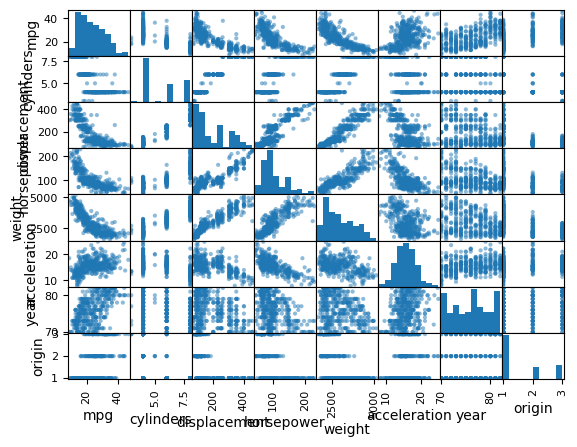

<Figure size 640x480 with 0 Axes>

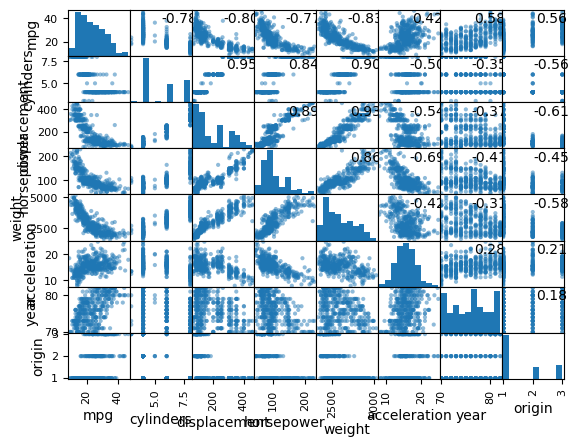

<Figure size 640x480 with 0 Axes>

In [22]:
#Multiple Linear Regression of Auto.csv dataset

#SCATTER MATRIX W/ AND W/O CORR

from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(X)
plt.show()

x = X.drop(columns='name', axis=1)

axes = scatter_matrix(x)
corr = x.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [23]:
#create new X and Y values where X does not include vehicle name
x = X[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = X['mpg']

#create MLR Model and print summary statistics
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          2.41e-141
Time:                        17:34:06   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


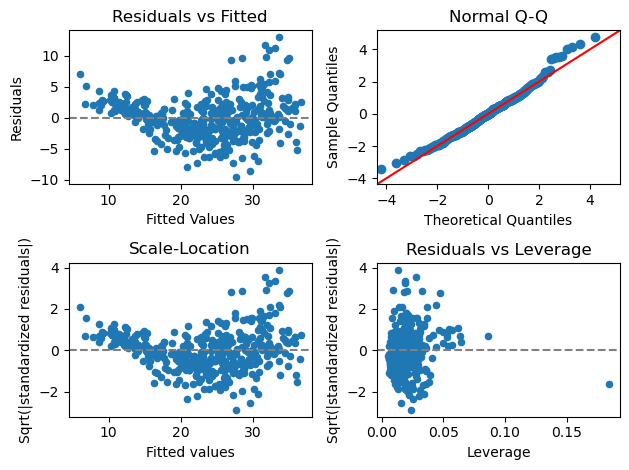

In [24]:
#DIAGNOSTIC PLOTS

import scipy.stats as stats

inf = results.get_influence()
mod = X.copy()
mod['residuals'] = results.resid
mod['fittedvalues'] = results.fittedvalues
mod['residuals_std'] = results.resid_pearson
mod['leverage'] = inf.hat_matrix_diag

figures, axes = plt.subplots(nrows=2, ncols=2)

# Residual against fitted values.
mod.plot.scatter(
    x='fittedvalues', y='residuals', ax=axes[0, 0]
)
axes[0, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# qqplot
sm.qqplot(
    mod['residuals'], dist=stats.t, fit=True, line='45',
    ax=axes[0, 1], c='#4C72B0'
)
axes[0, 1].set_title('Normal Q-Q')

# The scale-location plot.
mod.plot.scatter(
    x='fittedvalues', y='residuals_std', ax=axes[1, 0]
)
axes[1, 0].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 0].set_title('Scale-Location')

# Standardized residuals vs. leverage
mod.plot.scatter(
    x='leverage', y='residuals_std', ax=axes[1, 1]
)
axes[1, 1].axhline(y=0, color='grey', linestyle='dashed')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Sqrt(|standardized residuals|)')
axes[1, 1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

In [7]:
#INTERACTIONS W/ PREDICTORS

import statsmodels.formula.api as smf
%matplotlib inline

def interactions(var1, var2):
    X['combo'] = var1 * var2
    
    model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + combo', data=X).fit()
    summary = model.summary()
    print(summary.tables[1])
    print(summary.tables[0])

interactions(X['cylinders'], X['displacement'])
interactions(X['cylinders'], X['horsepower'])
interactions(X['cylinders'], X['weight'])
interactions(X['cylinders'], X['acceleration'])
interactions(X['cylinders'], X['year'])
interactions(X['cylinders'], X['origin'])
interactions(X['displacement'], X['horsepower'])
interactions(X['displacement'], X['weight'])
interactions(X['displacement'], X['acceleration'])
interactions(X['displacement'], X['year'])
interactions(X['displacement'], X['origin'])
interactions(X['horsepower'], X['weight'])
interactions(X['horsepower'], X['acceleration'])
interactions(X['horsepower'], X['year'])
interactions(X['horsepower'], X['origin'])
interactions(X['weight'], X['acceleration'])
interactions(X['weight'], X['year'])
interactions(X['weight'], X['origin'])
interactions(X['acceleration'], X['year'])
interactions(X['acceleration'], X['origin'])
interactions(X['year'], X['origin'])

#INTERACTIONS ONLY

def interactions_only(var1, var2, var3, var4, var5, var6, var7):
    X['combo1_2'] = var1 * var2
    X['combo3_4'] = var3 * var4
    X['combo5_6_7'] = var5 * var6 * var7
    
    model = smf.ols(formula='mpg ~ combo1_2 + combo3_4 + combo5_6_7', data=X).fit()
    summary = model.summary()
    print(summary.tables[1])
    print(summary.tables[0])

interactions_only(X['cylinders'], X['displacement'], X['horsepower'], X['weight'], X['acceleration'], X['year'], X['origin']) #bad 0.682
interactions_only(X['displacement'], X['horsepower'], X['weight'], X['acceleration'], X['year'], X['origin'], X['cylinders']) #bad 0.661
interactions_only(X['horsepower'], X['weight'], X['acceleration'], X['year'], X['origin'], X['cylinders'], X['displacement']) #bad 0.624
interactions_only(X['weight'], X['acceleration'], X['year'], X['origin'], X['cylinders'], X['displacement'], X['horsepower']) #bad 0.662
interactions_only(X['acceleration'], X['year'], X['origin'], X['cylinders'], X['displacement'], X['horsepower'], X['weight']) #bad 0.563
interactions_only(X['year'], X['origin'], X['cylinders'], X['displacement'], X['horsepower'], X['weight'], X['acceleration']) #goodish 0.704
interactions_only(X['origin'], X['cylinders'], X['displacement'], X['horsepower'], X['weight'], X['acceleration'], X['year']) #bad 0.627

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2248      4.661     -0.906      0.365     -13.388       4.939
cylinders       -2.6365      0.409     -6.452      0.000      -3.440      -1.833
displacement    -0.0783      0.014     -5.533      0.000      -0.106      -0.051
horsepower      -0.0399      0.013     -3.092      0.002      -0.065      -0.015
weight          -0.0055      0.001     -8.939      0.000      -0.007      -0.004
acceleration     0.0982      0.090      1.091      0.276      -0.079       0.275
year             0.7709      0.047     16.390      0.000       0.678       0.863
origin           0.6749      0.272      2.483      0.013       0.141       1.209
combo            0.0136      0.002      7.890      0.000       0.010       0.017
                            OLS Regression Results                            
Dep. Variable:                

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -33.2651      4.948     -6.723      0.000     -42.993     -23.537
cylinders        0.1143      0.319      0.358      0.721      -0.514       0.742
displacement    -0.0073      0.008     -0.882      0.378      -0.023       0.009
horsepower       0.1280      0.025      5.128      0.000       0.079       0.177
weight          -0.0045      0.001     -6.483      0.000      -0.006      -0.003
acceleration     0.9757      0.163      5.983      0.000       0.655       1.296
year             0.7685      0.048     15.945      0.000       0.674       0.863
origin           1.0003      0.270      3.711      0.000       0.470       1.530
combo           -0.0113      0.002     -6.379      0.000      -0.015      -0.008
                            OLS Regression Results                            
Dep. Variable:                

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.8251      1.983     15.043      0.000      25.927      33.723
combo1_2   -2.856e-05   2.55e-06    -11.194      0.000   -3.36e-05   -2.35e-05
combo3_4       0.0022      0.001      1.588      0.113      -0.001       0.005
combo5_6_7     0.0005      0.001      0.870      0.385      -0.001       0.002
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     213.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.07e-82
Time:                        17:12:24   Log-Likelihood:                -1188.0
No. Observations:                 397   AIC:        

In [8]:
import math

#Set the other variables' columns to arrays
cylinders = np.array(X['cylinders'])
displacement = np.array(X['displacement'])
weight = np.array(X['weight'])
acceleration = np.array(X['acceleration'])
year = np.array(X['year'])
origin = np.array(X['origin'])
name = np.array(X['name'])

#SQUARE ROOT VARIABLES

cyl_sqrt = []
for c in cylinders:
    c = math.sqrt(c)
    cyl_sqrt.append(c)
X['cyl_sqrt'] = cyl_sqrt
model = smf.ols(formula='mpg ~ cyl_sqrt + displacement + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

dis_sqrt = []
for d in displacement:
    d = math.sqrt(d)
    dis_sqrt.append(d)
X['dis_sqrt'] = dis_sqrt
model = smf.ols(formula='mpg ~ cylinders + dis_sqrt + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

hp_sqrt = []
for h in hp:
    h[1] = math.sqrt(h[1])
    hp_sqrt.append(h[1])
X['hp_sqrt'] = hp_sqrt
model = smf.ols(formula='mpg ~ cylinders + displacement + hp_sqrt + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

we_sqrt = []
for w in weight:
    w = math.sqrt(w)
    we_sqrt.append(w)
X['we_sqrt'] = we_sqrt
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + we_sqrt + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

acc_sqrt = []
for a in acceleration:
    a = math.sqrt(a)
    acc_sqrt.append(a)
X['acc_sqrt'] = acc_sqrt
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acc_sqrt + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

yr_sqrt = []
for y in year:
    y = math.sqrt(y)
    yr_sqrt.append(y)
X['yr_sqrt'] = yr_sqrt
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + yr_sqrt + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

or_sqrt = []
for o in origin:
    o = math.sqrt(o)
    or_sqrt.append(o)
X['or_sqrt'] = or_sqrt
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + or_sqrt', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.1672      5.204     -2.915      0.004     -25.398      -4.936
cyl_sqrt        -2.7335      1.504     -1.818      0.070      -5.690       0.223
displacement     0.0210      0.007      2.818      0.005       0.006       0.036
horsepower      -0.0107      0.013     -0.809      0.419      -0.037       0.015
weight          -0.0067      0.001    -10.464      0.000      -0.008      -0.005
acceleration     0.1182      0.097      1.223      0.222      -0.072       0.308
year             0.7619      0.051     15.087      0.000       0.663       0.861
origin           1.3966      0.274      5.091      0.000       0.857       1.936
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                          

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -21.6161      4.692     -4.607      0.000     -30.841     -12.391
cylinders       -0.4507      0.322     -1.401      0.162      -1.083       0.182
displacement     0.0200      0.008      2.658      0.008       0.005       0.035
horsepower      -0.0102      0.013     -0.769      0.442      -0.036       0.016
weight          -0.0068      0.001    -10.582      0.000      -0.008      -0.006
acceleration     0.1176      0.097      1.217      0.224      -0.072       0.307
year             0.7661      0.050     15.183      0.000       0.667       0.865
or_sqrt          3.9465      0.748      5.275      0.000       2.476       5.417
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                          

In [9]:
#SQUARED VARIABLES

cyl_sq = []
for m in cylinders:
    m = m**2
    cyl_sq.append(m)
X['cyl_sq'] = cyl_sq
model = smf.ols(formula='mpg ~ cyl_sq + displacement + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

dis_sq = []
for d in displacement:
    d = d**2
    dis_sq.append(d)
X['dis_sq'] = dis_sq
model = smf.ols(formula='mpg ~ cylinders + dis_sq + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

hp_sq = []
for h in hp:
    h[1] = h[1]**2
    hp_sq.append(h[1])
X['hp_sq'] = hp_sq
model = smf.ols(formula='mpg ~ cylinders + displacement + hp_sq + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

we_sq = []
for w in weight:
    w = w**2
    we_sq.append(w)
X['we_sq'] = we_sq
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + we_sq + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

acc_sq = []
for a in acceleration:
    a = a**2
    acc_sq.append(a)
X['acc_sq'] = acc_sq
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acc_sq + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

yr_sq = []
for y in year:
    y = y**2
    yr_sq.append(y)
X['yr_sq'] = yr_sq
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + yr_sq + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

or_sq = []
for o in origin:
    o = o**2
    or_sq.append(o)
X['or_sq'] = or_sq
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + or_sq', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.8544      4.550     -4.364      0.000     -28.800     -10.909
cyl_sq          -0.0078      0.027     -0.287      0.774      -0.062       0.046
displacement     0.0134      0.007      1.809      0.071      -0.001       0.028
horsepower      -0.0075      0.013     -0.570      0.569      -0.034       0.018
weight          -0.0068      0.001    -10.634      0.000      -0.008      -0.006
acceleration     0.1212      0.097      1.248      0.213      -0.070       0.312
year             0.7634      0.051     15.057      0.000       0.664       0.863
origin           1.3712      0.277      4.946      0.000       0.826       1.916
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                          

In [10]:
#LOG VARIABLES

cyl_log = []
for m in cylinders:
    m = math.log(m)
    cyl_log.append(m)
X['cyl_log'] = cyl_log
model = smf.ols(formula='mpg ~ cyl_log + displacement + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

dis_log = []
for d in displacement:
    d = math.log(d)
    dis_log.append(d)
X['dis_log'] = dis_log
model = smf.ols(formula='mpg ~ cylinders + dis_log + horsepower + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

hp_log = []
for h in hp:
    h[1] = math.log(h[1])
    hp_log.append(h[1])
X['hp_log'] = hp_log
model = smf.ols(formula='mpg ~ cylinders + displacement + hp_log + weight + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

we_log = []
for w in weight:
    w = math.log(w)
    we_log.append(w)
X['we_log'] = we_log
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + we_log + acceleration + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

acc_log = []
for a in acceleration:
    a = math.log(a)
    acc_log.append(a)
X['acc_log'] = acc_log
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acc_log + year + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

yr_log = []
for y in year:
    y = math.log(y)
    yr_log.append(y)
X['yr_log'] = yr_log
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + yr_log + origin', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

or_log = []
for o in origin:
    o = math.log(o)
    or_log.append(o)
X['or_log'] = or_log
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + or_log', data=X).fit()
summary = model.summary()
print(summary.tables[1])
print(summary.tables[0])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.6360      4.930     -3.172      0.002     -25.328      -5.944
cyl_log         -3.6470      1.709     -2.135      0.033      -7.006      -0.288
displacement     0.0223      0.007      3.029      0.003       0.008       0.037
horsepower      -0.0120      0.013     -0.905      0.366      -0.038       0.014
weight          -0.0067      0.001    -10.443      0.000      -0.008      -0.005
acceleration     0.1199      0.096      1.243      0.215      -0.070       0.310
year             0.7615      0.050     15.103      0.000       0.662       0.861
origin           1.3889      0.273      5.079      0.000       0.851       1.927
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                          